In [69]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

INPUT = '/scratch/users/k21075402/new/commons_harvest__open/eb100aee'
FILES = [f'n_c_{i}.json' for i in range(8)]

In [25]:
df = pd.read_json(os.path.join(INPUT, FILES[0]))
df['env_runners']['policy_reward_mean']

{'player_0': 17.435555555555556,
 'player_1': 13.862222222222222,
 'player_2': 10.644444444444444,
 'player_3': 12.36888888888889,
 'player_4': 8.404444444444444,
 'player_5': 8.342222222222222,
 'player_6': 9.315555555555555}

In [26]:
list(df['env_runners']['policy_reward_mean'].values())

[17.435555555555556,
 13.862222222222222,
 10.644444444444444,
 12.36888888888889,
 8.404444444444444,
 8.342222222222222,
 9.315555555555555]

In [44]:
rewards_c = []
rewards_d = []
for n_c, f in enumerate(FILES):
    rewards = list(pd.read_json(os.path.join(INPUT, f))['env_runners']['policy_reward_mean'].values())
    # print(n_c, rewards[:n_c], rewards[n_c:])
    rewards_c.append(np.mean(rewards[:n_c]))
    rewards_d.append(np.mean(rewards[n_c:]))
rewards_c, rewards_d

/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/richard/mambaforge/envs/paper_2/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


([nan,
  8.004444444444445,
  7.96,
  6.96888888888889,
  7.383333333333334,
  8.995555555555557,
  19.081481481481482,
  71.16952380952381],
 [11.481904761904762,
  12.6362962962963,
  14.499555555555554,
  18.983333333333334,
  26.604444444444443,
  43.32888888888889,
  94.46222222222222,
  nan])

In [66]:
df = pd.DataFrame({'rewards_c': rewards_c, 'rewards_d': rewards_d})
df['social_welfare'] = df.index * df['rewards_c'].fillna(0) + (7-df.index) * df['rewards_d'].fillna(0)
# shift rewards_c so schelling
df['rewards_c'] = np.roll(df['rewards_c'], -1)
df


,rewards_c,rewards_d,social_welfare
0,8.004444,11.481905,80.373333
1,7.960000,12.636296,83.822222
2,6.968889,14.499556,88.417778
3,7.383333,18.983333,96.840000
4,8.995556,26.604444,109.346667
5,19.081481,43.328889,131.635556
6,71.169524,94.462222,208.951111
7,NaN,NaN,498.186667


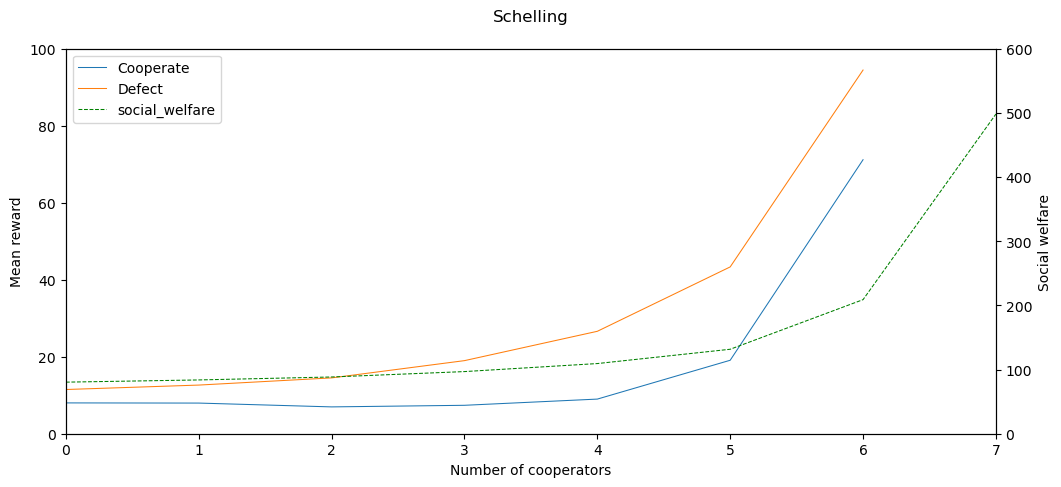

In [91]:
# plot SW on RHS
fig, ax = plt.subplots(figsize=(12, 5), facecolor='white')
df.plot(y='rewards_c', ax=ax, label= 'rewards_c', lw=0.75)
df.plot(y='rewards_d', ax=ax, label= 'rewards_d', lw=0.75)

ax.set_xlabel('Number of cooperators')
ax.set_ylabel('Mean reward')
ax.set_title(f'Schelling', y=1.05)
ax.set_ylim(0, 100)
ax.set_xlim(0, 7)

ax2 = ax.twinx()
df.plot(y='social_welfare', ax=ax2, label= 'social_welfare', lw=0.75, linestyle='--', color='green')

ax2.set_ylim(0, 600)
ax2.set_ylabel('Social welfare')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, ['Cooperate', 'Defect'] + labels2, loc='upper left')
ax2.get_legend().remove()

fig.savefig('schelling_commons_harvest__open', dpi=300, bbox_inches='tight')